In [ ]:
# 5-min machine learning episode 10
# Individual Conditional Expectation (ICE)
# written by S.L. in 2020 Aug
# Reference
# http://restanalytics.com/2019-05-18-Machine-Learning-Interpretability/
# https://github.com/AustinRochford/PyCEbox/blob/master/notebooks/PyCEBox%20Tutorial.ipynb
# https://christophm.github.io/interpretable-ml-book/ice.html

In [ ]:
print(__doc__)

from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import PuOr
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import make_pipeline

from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing

In [ ]:
from pycebox.ice import ice, ice_plot

In [ ]:
cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target

y -= y.mean() # substract mean

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    random_state=0)

In [5]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
         0.4 ,  0.45]), <a list of 11 Text yticklabel objects>)

<Figure size 432x288 with 0 Axes>

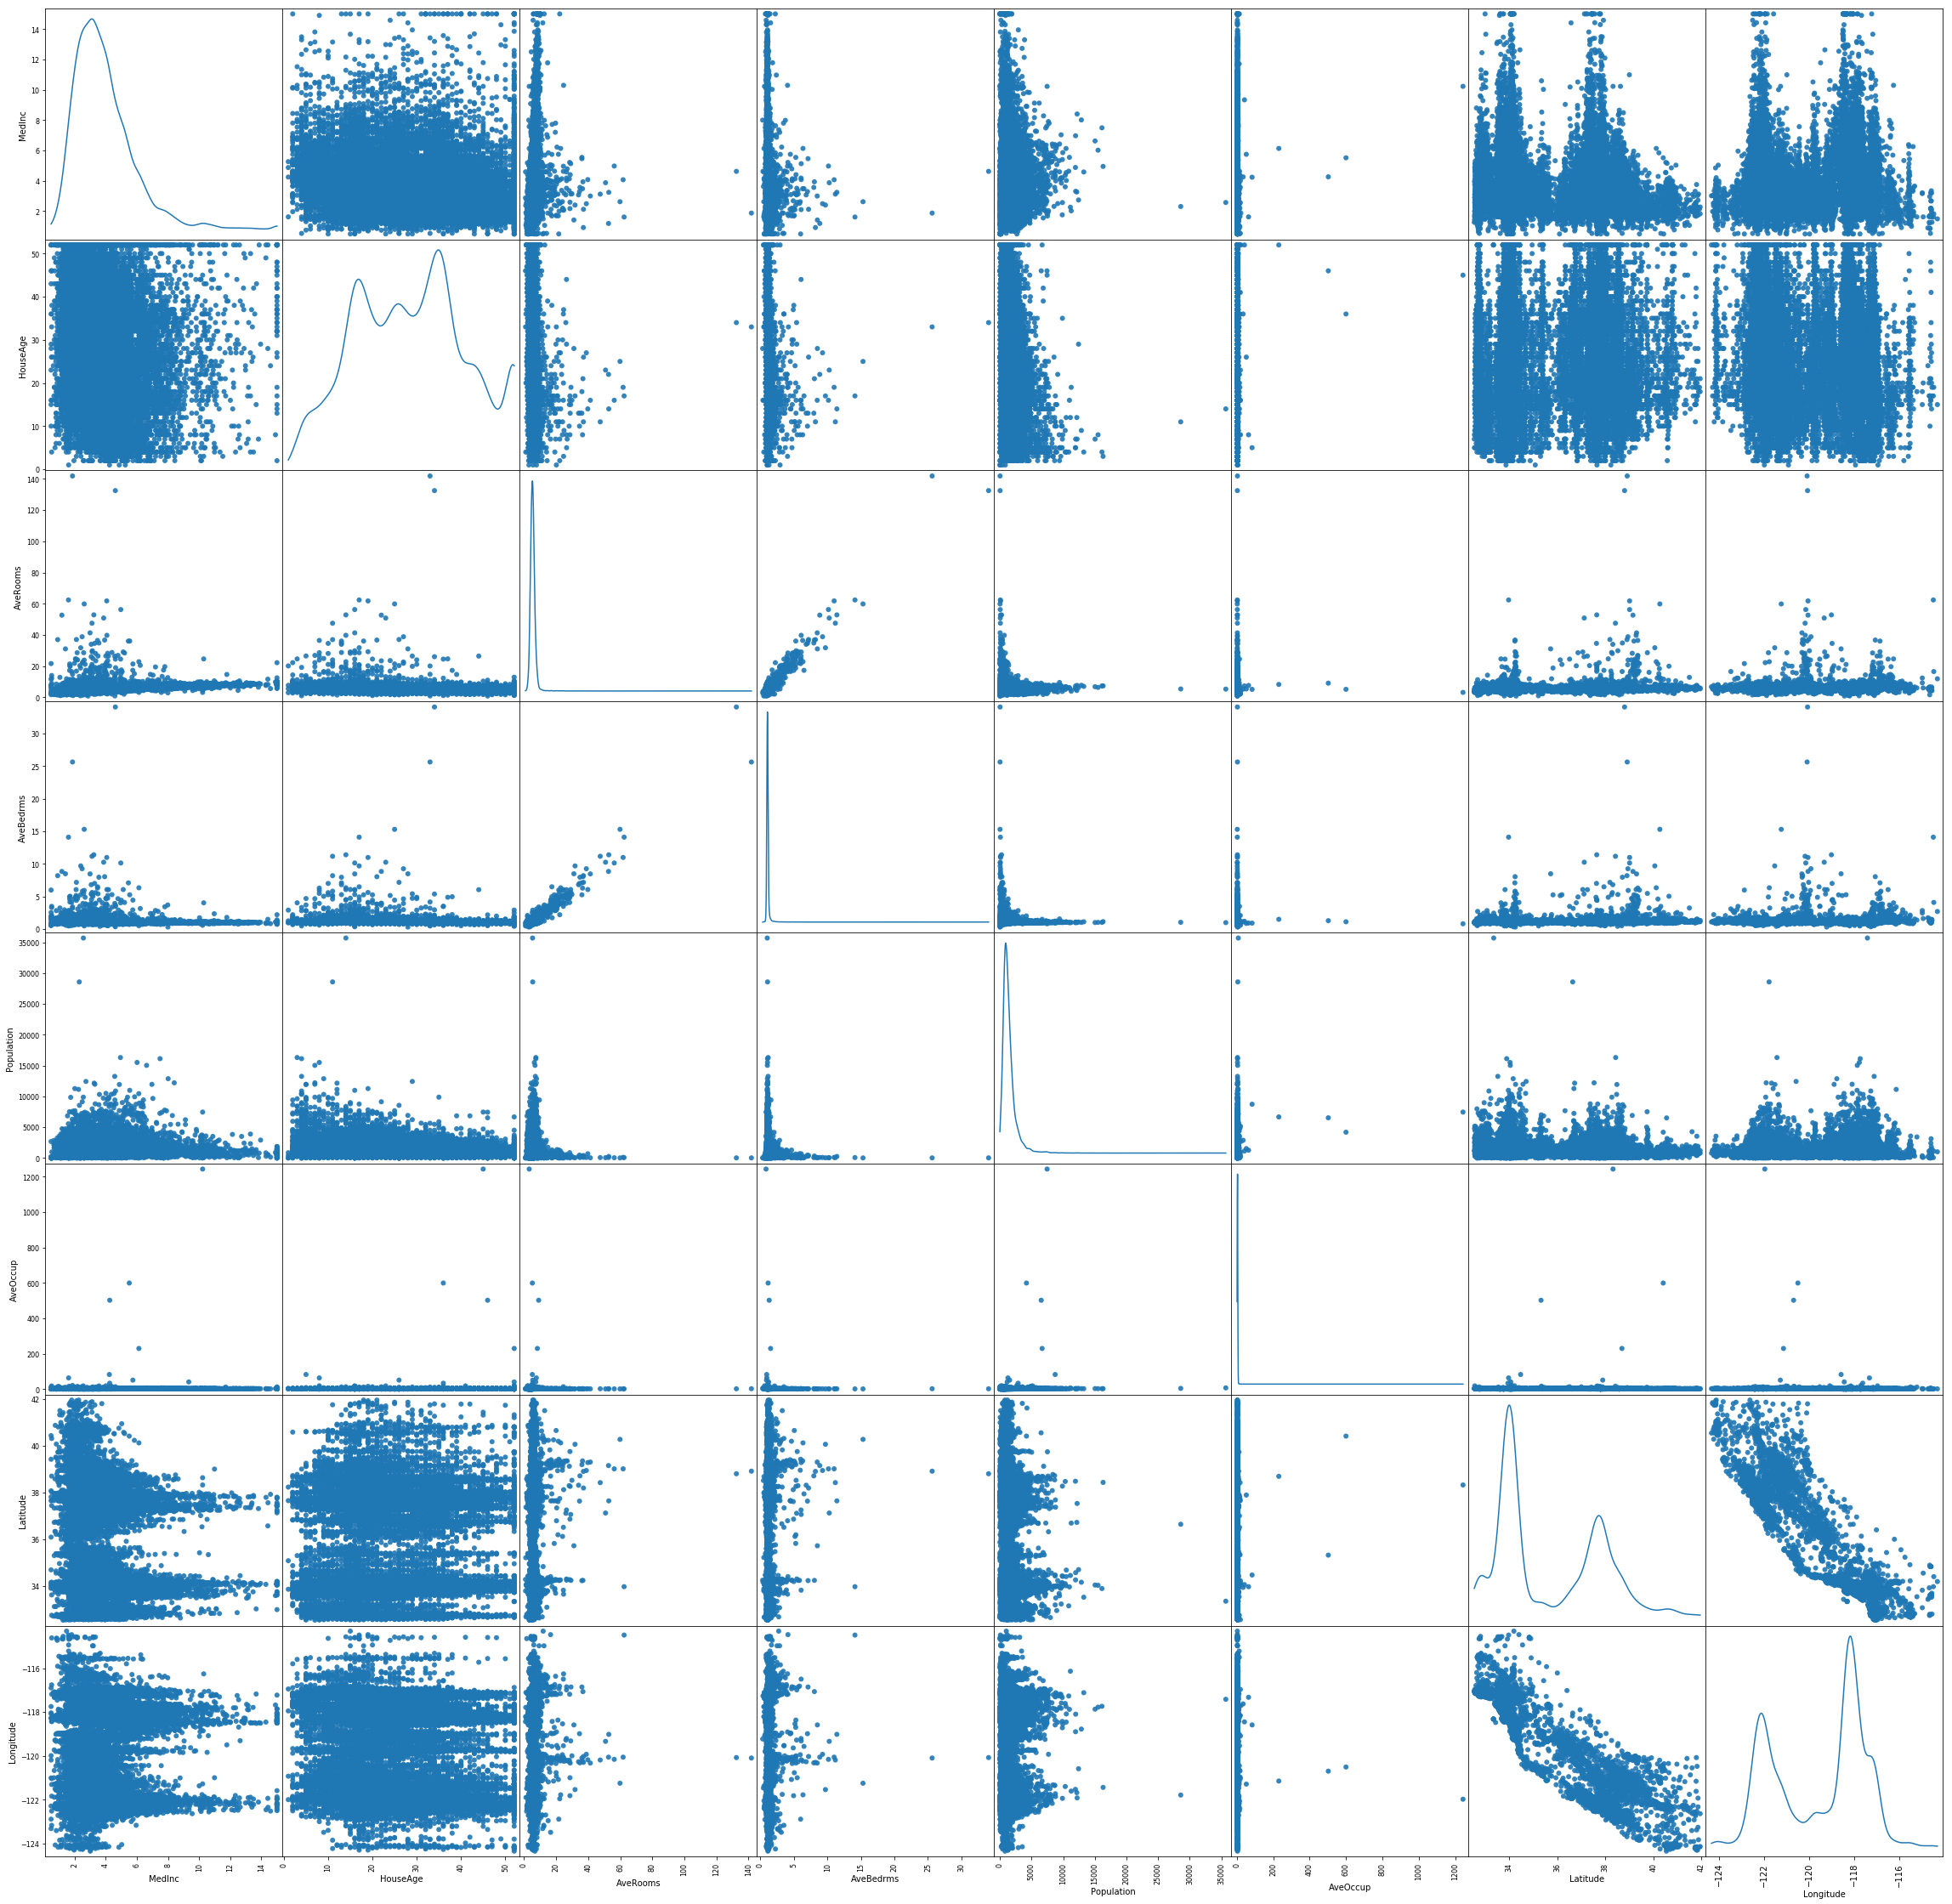

In [6]:
fig = plt.figure()
pd.plotting.scatter_matrix(X,figsize =(40,40),alpha=0.9,diagonal="kde",marker="o");
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
#plt.savefig("scatter_matrix.jpg", dpi = 700)

In [7]:
print("Training GradientBoostingRegressor...")
tic = time()
est = HistGradientBoostingRegressor()
est.fit(X_train, y_train)
print("done in {:.2f}s".format(time() - tic))
print("Test R2 score: {:.2f}".format(est.score(X_test, y_test)))

Training GradientBoostingRegressor...
done in 1.73s
Test R2 score: 0.85


Computing partial dependence plots...
done in 3.466s


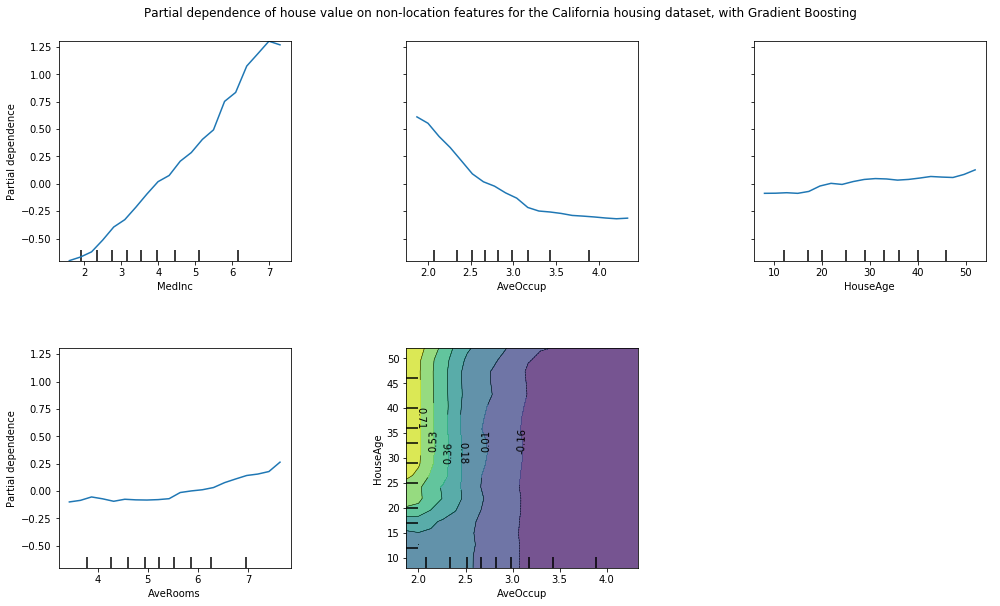

In [8]:
print('Computing partial dependence plots...')
tic = time()
features = ['MedInc', 'AveOccup', 'HouseAge', 'AveRooms',
            ('AveOccup', 'HouseAge')]
plot_partial_dependence(est, X_train, features,
                        n_jobs=3, grid_resolution=20)
print("done in {:.3f}s".format(time() - tic))
fig = plt.gcf()
fig.set_size_inches(14, 9)
fig.suptitle('Partial dependence of house value on non-location features for the California housing dataset, with Gradient Boosting')
fig.subplots_adjust(wspace=0.5, hspace=0.4)
fig.tight_layout(rect=[0, 0.05, 1, 0.95])
#fig.savefig("PDP.jpg", dpi = 900)

In [9]:
ice_df = ice(data = X_train, column = 'MedInc', predict = est.predict, num_grid_points=10)

In [10]:
ice_df.head

<bound method NDFrame.head of data_MedInc   0.4999                                                     \
HouseAge         10.0      15.0      16.0      23.0      28.0      36.0   
AveRooms    6.740000  11.596491 21.631579 6.054545  7.677419  2.500000    
AveBedrms    2.040000  2.561404  6.000000  1.672727  1.870968  0.833333   
Population     108.0     131.0     26.0      198.0     142.0     15.0     
AveOccup     2.160000  2.298246  1.368421  3.600000  4.580645  2.500000   
Latitude        34.69     40.43     39.42     36.09     34.15     33.90   
Longitude     -116.90   -123.32   -122.89   -119.99   -118.08   -118.04   
MedInc                                                                    
0.499900    -1.268439 -1.340169 -1.284203 -1.169233  0.740494 -0.439080   
1.965700    -1.251728 -1.243453 -1.092160 -1.150904  0.617755 -0.151238   
2.455900    -1.082200 -1.117957 -0.961567 -1.068804  0.802361 -0.170590   
2.895800    -0.978691 -1.094364 -0.955211 -1.014733  0.884385 -0.05573

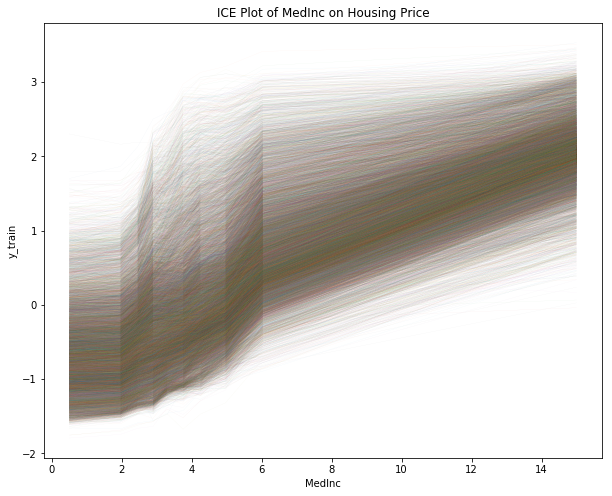

In [11]:
plt.rcParams['figure.figsize'] = 10,8
ice_plot(ice_df, linewidth = .15, cmap=PuOr, alpha = 0.1)

plt.ylabel('y_train')
plt.xlabel('MedInc')
plt.title('ICE Plot of MedInc on Housing Price')
plt.show()

Text(0.5, 1.0, 'ICE Plot of MedInc on Housing Price')

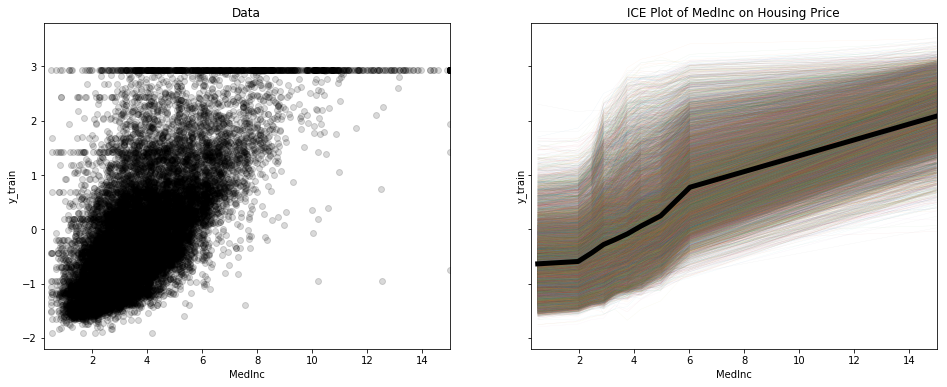

In [12]:
fig, (data_ax, ice_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(16, 6))
data_ax.scatter(X_train.MedInc, y_train, c='k', alpha=0.15)
data_ax.set_xlim(0.25, 15)
data_ax.set_xlabel('MedInc')
data_ax.set_ylabel('y_train')
data_ax.set_title('Data')
#ice_plot(ice_df, frac_to_plot=0.1,
#        c='k', alpha=0.25,
#         ax=ice_ax)
ice_plot(ice_df, linewidth=0.25, cmap=PuOr, alpha = 0.1, ax = ice_ax , plot_pdp=True, 
         pdp_kwargs={'c': 'k', 'linewidth': 5})
ice_ax.set_xlabel('MedInc')
ice_ax.set_ylabel('y_train')
ice_ax.set_title('ICE Plot of MedInc on Housing Price')